In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
raw_data=pd.read_csv("3.1 Countries_exercise.csv.csv")
raw_data.describe()


,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


In [8]:
df=raw_data.copy()

# Plot data

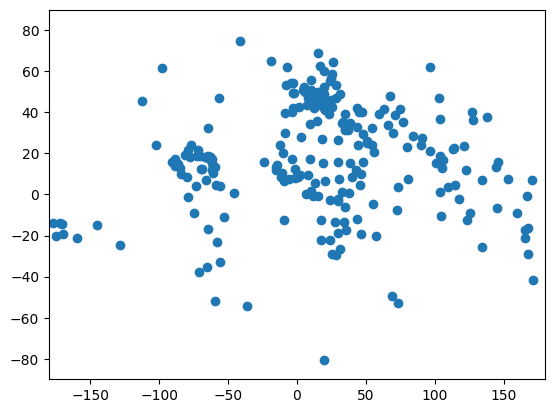

In [10]:
plt.scatter(df['Longitude'],df['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [21]:
# df.iloc(:,0,2)
x=df.iloc[:,1:]
x.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


# Clustering

In [68]:
kmeans=KMeans(3)

In [69]:
kmeans.fit(x)

KMeans(n_clusters=3)

# Clustering Result 

In [70]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2,
       1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0,
       0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0])

In [71]:
data_with_clusters=df.copy()
data_with_clusters['cluster']=identified_clusters
data_with_clusters.head()

,name,Longitude,Latitude,cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0


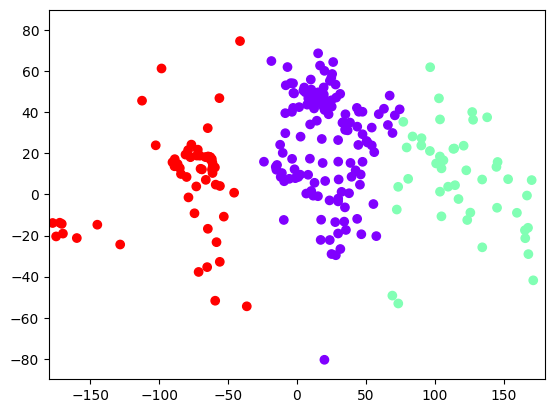

In [72]:
plt.scatter(df['Longitude'],df['Latitude'],c=data_with_clusters['cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# Deciding the K...

In [50]:
wcss=[]

In [52]:
for i in range (1,242):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

In [53]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055905,
 256573.086759343,
 192356.48001889366,
 152164.1522106638,
 126990.80050429133,
 102913.61962302419,
 84927.05022223275,
 76615.77904339501,
 69379.31851481686,
 63012.881383208645,
 59024.392480194285,
 53339.97475639211,
 51553.26644748654,
 48368.70924744988,
 44945.806056846224,
 42216.167812819935,
 39353.748848224925,
 36832.56933020903,
 34650.222515048205,
 32181.34812404276,
 30325.147752860492,
 28893.381865486786,
 27458.928447339753,
 25455.76710280805,
 24186.621045767202,
 23228.065300280843,
 22348.31731517384,
 20961.384534843524,
 19885.87486993955,
 19195.993497886047,
 17586.448465724334,
 16619.975485421062,
 16048.303766901854,
 15137.104009571856,
 14947.551072218797,
 14659.897938924598,
 14221.505277926337,
 13386.936837199937,
 13076.640078343873,
 12278.229807501686,
 11800.719921410755,
 11353.293627871908,
 10523.465261371855,
 10701.250909177734,
 10184.933913951636,
 10045.00905635828,
 9629.30

# The Elbow Method

Text(0, 0.5, '__WCSS__')

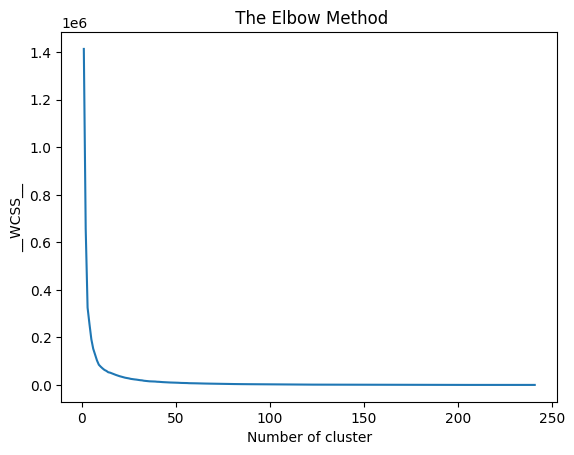

In [55]:
number_cluster=range(1,242)
plt.plot(number_cluster,wcss)
plt.title(" The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("__WCSS__")

In [66]:
wcss=[]
for i in range (1,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, '__WCSS__')

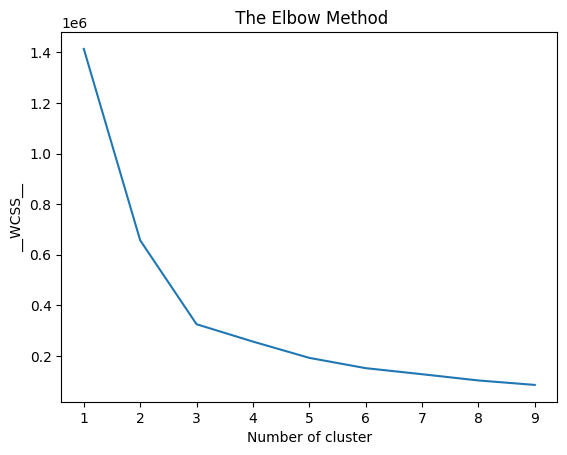

In [67]:
number_cluster=range(1,10)
plt.plot(number_cluster,wcss)
plt.title(" The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("__WCSS__")